In [40]:
# https://medium.com/@danalindquist/using-new-york-times-api-and-jq-to-collect-news-data-a5f386c7237b

In [4]:
import requests

app_id = 'd1f4cfd5-2a86-4c76-8593-5f999bf1a02d' 
api_key = 'MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n'

In [219]:
url = 'https://api.nytimes.com/svc/archive/v1/2019/1.json?api-key='+api_key
r = requests.get(url)
data = r.json()
data

{'copyright': 'Copyright (c) 2019 The New York Times Company. All Rights Reserved.',
 'response': {'meta': {'hits': 6977},
  'docs': [{'web_url': 'https://www.nytimes.com/2019/01/02/obituaries/daryl-dragon-dead.html',
    'snippet': 'He and his wife, Toni Tennille, were one of the most successful hit-making combinations of the 1970s. Their “Love Will Keep Us Together” went to No. 1.',
    'lead_paragraph': 'He and his wife, Toni Tennille, were one of the most successful hit-making combinations of the 1970s. Their “Love Will Keep Us Together” went to No. 1.',
    'print_page': '10',
    'blog': [],
    'source': 'The New York Times',
    'multimedia': [{'rank': 0,
      'subtype': 'xlarge',
      'caption': None,
      'credit': None,
      'type': 'image',
      'url': 'images/2019/01/03/obituaries/03DRAGON1-print/merlin_148690920_b809ab8a-e519-4e75-8770-9d43fe082f7c-articleLarge.jpg',
      'height': 446,
      'width': 600,
      'legacy': {'xlarge': 'images/2019/01/03/obituaries/03D

In [220]:
import pyjq
copyright = pyjq.all('.copyright', data)
num_docs = pyjq.all('.response .docs | length', data)[0]
print(num_docs)

6977


In [221]:
jq_query = f'.response .docs [] | {{url: .web_url, snippet: .snippet, headline: .headline .main, date: .pub_date, category: .news_desk}}'
output = pyjq.all(jq_query, data)
output

[OrderedDict([('url',
               'https://www.nytimes.com/2019/01/02/obituaries/daryl-dragon-dead.html'),
              ('snippet',
               'He and his wife, Toni Tennille, were one of the most successful hit-making combinations of the 1970s. Their “Love Will Keep Us Together” went to No. 1.'),
              ('headline',
               'Daryl Dragon, of the Captain and Tennille Pop Duo, Dies at 76'),
              ('date', '2019-01-03T00:10:00+0000'),
              ('category', 'Obits')]),
 OrderedDict([('url',
               'https://www.nytimes.com/2019/01/02/world/europe/sweden-doula-childbirth.html'),
              ('snippet',
               'In Sweden, midwives deliver babies. But doula culture interpreters act as bridges between midwives and immigrant women.'),
              ('headline',
               'Where Doulas Calm Nerves and Bridge Cultures During Childbirth'),
              ('date', '2019-01-02T22:17:38+0000'),
              ('category', 'Foreign')]),
 OrderedD

In [222]:
len(output)

6977

In [223]:
output[0]['snippet']

'He and his wife, Toni Tennille, were one of the most successful hit-making combinations of the 1970s. Their “Love Will Keep Us Together” went to No. 1.'

In [224]:
for key, value in output[0].items():
    print(key)
    print(value)

url
https://www.nytimes.com/2019/01/02/obituaries/daryl-dragon-dead.html
snippet
He and his wife, Toni Tennille, were one of the most successful hit-making combinations of the 1970s. Their “Love Will Keep Us Together” went to No. 1.
headline
Daryl Dragon, of the Captain and Tennille Pop Duo, Dies at 76
date
2019-01-03T00:10:00+0000
category
Obits


In [225]:
business = []
for i in output:
    if i['category'] == 'Business':
        business.append(i)  

In [226]:
business

[OrderedDict([('url',
               'https://www.nytimes.com/2019/01/02/technology/apple-revenue-decline-china.html'),
              ('snippet',
               'A surprise announcement added to concerns about the ability of American tech giants to navigate an increasingly uncertain economy and a trade war with China.'),
              ('headline',
               'Apple Cuts Revenue Forecast Because of Slow iPhone Sales in China'),
              ('date', '2019-01-02T22:03:34+0000'),
              ('category', 'Business')]),
 OrderedDict([('url',
               'https://www.nytimes.com/2019/01/01/technology/big-tech-troubled-just-getting-started.html'),
              ('snippet',
               'Even as Facebook, Google and others confronted challenges in 2018, their ambitions were undimmed. After all, so much of life remains undisrupted.'),
              ('headline',
               'Big Tech May Look Troubled, but It’s Just Getting Started'),
              ('date', '2019-01-01T15:28:36+0

In [227]:
len(business)

440

In [228]:
import pandas as pd
df = pd.DataFrame(business)
df.drop_duplicates(keep=False, inplace=True)
df

url  \
12   https://www.nytimes.com/2019/01/01/business/de...   
14   https://www.nytimes.com/2019/01/02/business/gl...   
15   https://www.nytimes.com/2019/01/02/business/te...   
19   https://www.nytimes.com/2019/01/01/technology/...   
21   https://www.nytimes.com/2019/01/02/business/ec...   
23   https://www.nytimes.com/2019/01/03/business/ca...   
32   https://www.nytimes.com/2019/01/03/technology/...   
37   https://www.nytimes.com/2019/01/04/business/ec...   
38   https://www.nytimes.com/2019/01/03/business/wo...   
42   https://www.nytimes.com/2019/01/05/business/en...   
43   https://www.nytimes.com/2019/01/04/business/ma...   
44   https://www.nytimes.com/2019/01/03/technology/...   
48   https://www.nytimes.com/2019/01/04/business/ec...   
49   https://www.nytimes.com/2019/01/03/business/de...   
52   https://www.nytimes.com/2019/01/04/business/ch...   
53   https://www.nytimes.com/2019/01/05/technology/...   
54   https://www.nytimes.com/2019/01/04/technology/...   
57   https://www.nytimes.com/2019/01/07/business/ho...   
69   https://www.nytimes.com/2019/01/06/business/ec...   
70   https://www.nytimes.com/2019/01/06/technology/...   
71   https://www.nytimes.com/2019/01/06/business/tr...   
73   https://www.nytimes.com/2019/01/07/business/de...   
78   https://www.nytimes.com/2019/01/08/business/de...   
79   https://www.nytimes.com/2019/01/09/technology/...   
84   https://www.nytimes.com/2019/01/09/business/so...   
88   https://www.nytimes.com/2019/01/06/business/me...   
99   https://www.nytimes.com/2019/01/08/business/me...   
100  https://www.nytimes.com/2019/01/08/business/ch...   
103  https://www.nytimes.com/2019/01/07/business/me...   
105  https://www.nytimes.com/2019/01/07/business/gh...   
..                                                 ...   
270  https://www.nytimes.com/2019/01/20/business/st...   
272  https://www.nytimes.com/2019/01/21/technology/...   
276  https://www.nytimes.com/2019/01/22/business/ma...   
283  https://www.nytimes.com/interactive/2019/01/21...   
296  https://www.nytimes.com/2019/01/22/technology/...   
298  https://www.nytimes.com/2019/01/23/business/re...   
300  https://www.nytimes.com/2019/01/21/business/ca...   
301  https://www.nytimes.com/2019/01/22/business/dy...   
303  https://www.nytimes.com/2019/01/23/business/me...   
310  https://www.nytimes.com/2019/01/23/business/ch...   
312  https://www.nytimes.com/2019/01/25/technology/...   
322  https://www.nytimes.com/2019/01/24/business/en...   
336  https://www.nytimes.com/2019/01/25/business/de...   
337  https://www.nytimes.com/2019/01/24/business/de...   
345  https://www.nytimes.com/2019/01/24/business/wi...   
367  https://www.nytimes.com/2019/01/29/realestate/...   
373  https://www.nytimes.com/2019/01/28/business/ec...   
374  https://www.nytimes.com/2019/01/28/business/te...   
378  https://www.nytimes.com/2019/01/29/technology/...   
382  https://www.nytimes.com/2019/01/28/technology/...   
386  https://www.nytimes.com/2019/01/30/business/al...   
388  https://www.nytimes.com/interactive/2018/busin...   
410  https://www.nytimes.com/2019/01/30/business/br...   
411  https://www.nytimes.com/2019/01/30/business/fo...   
412  https://www.nytimes.com/2019/01/29/business/pg...   
413  https://www.nytimes.com/2019/01/29/technology/...   
414  https://www.nytimes.com/2019/01/30/business/ca...   
415  https://www.nytimes.com/2019/01/30/business/fe...   
432  https://www.nytimes.com/2019/01/31/technology/...   
437  https://www.nytimes.com/2019/01/31/business/de...   

                                               snippet  \
12   Four cases in December show that insider tradi...   
14   Weak manufacturing data from China soured inve...   
15   The automaker said sales of the Model 3 sedan ...   
19   The Commerce Department is considering nationa...   
21   Europe’s central bank took control of troubled...   
23   While carmakers and audio teams must battle ov...   
32   A.I. that responds to your voice. Next-gene

In [229]:
df['date'] = df['date'].map(lambda i: str(i)[:10])

In [230]:
import datetime
df['date'] = df['date'].map(lambda i: datetime.datetime.strptime(i, '%Y-%m-%d'))

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 12 to 437
Data columns (total 5 columns):
url         96 non-null object
snippet     96 non-null object
headline    96 non-null object
date        96 non-null datetime64[ns]
category    96 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 4.5+ KB


In [232]:
df['text'] = df.snippet + df.headline

In [233]:
df.drop(columns=['snippet', 'headline', 'category'], inplace=True)

In [234]:
df.set_index('date', inplace=True)
df.sort_index(axis=0, inplace=True)

In [238]:
df

url  \
date                                                            
2019-01-01  https://www.nytimes.com/2019/01/01/business/de...   
2019-01-01  https://www.nytimes.com/2019/01/01/technology/...   
2019-01-02  https://www.nytimes.com/2019/01/02/business/gl...   
2019-01-02  https://www.nytimes.com/2019/01/02/business/te...   
2019-01-02  https://www.nytimes.com/2019/01/02/business/ec...   
2019-01-03  https://www.nytimes.com/2019/01/03/business/ca...   
2019-01-03  https://www.nytimes.com/2019/01/03/technology/...   
2019-01-03  https://www.nytimes.com/2019/01/03/business/wo...   
2019-01-03  https://www.nytimes.com/2019/01/03/business/de...   
2019-01-04  https://www.nytimes.com/2019/01/04/business/ec...   
2019-01-04  https://www.nytimes.com/2019/01/04/technology/...   
2019-01-04  https://www.nytimes.com/2019/01/04/business/ma...   
2019-01-04  https://www.nytimes.com/2019/01/03/technology/...   
2019-01-04  https://www.nytimes.com/2019/01/04/business/ec...   
2019-01-04  https://www.nytimes.com/2019/01/04/business/ch...   
2019-01-05  https://www.nytimes.com/2019/01/05/technology/...   
2019-01-05  https://www.nytimes.com/2019/01/05/business/en...   
2019-01-06  https://www.nytimes.com/2019/01/06/business/ec...   
2019-01-06  https://www.nytimes.com/2019/01/06/technology/...   
2019-01-06  https://www.nytimes.com/2019/01/06/business/tr...   
2019-01-07  https://www.nytimes.com/2019/01/07/business/ho...   
2019-01-07  https://www.nytimes.com/2019/01/07/business/de...   
2019-01-07  https://www.nytimes.com/2019/01/06/business/me...   
2019-01-07  https://www.nytimes.com/2019/01/07/business/me...   
2019-01-08  https://www.nytimes.com/2019/01/08/business/de...   
2019-01-08  https://www.nytimes.com/2019/01/08/business/me...   
2019-01-08  https://www.nytimes.com/2019/01/08/business/ch...   
2019-01-08  https://www.nytimes.com/2019/01/07/business/gh...   
2019-01-09  https://www.nytimes.com/2019/01/09/business/me...   
2019-01-09  https://www.nytimes.com/2019/01/09/business/us...   
...                                                       ...   
2019-01-21  https://www.nytimes.com/2019/01/21/business/ai...   
2019-01-21  https://www.nytimes.com/2019/01/21/technology/...   
2019-01-22  https://www.nytimes.com/2019/01/21/business/ca...   
2019-01-22  https://www.nytimes.com/2019/01/22/technology/...   
2019-01-22  https://www.nytimes.com/2019/01/22/business/dy...   
2019-01-22  https://www.nytimes.com/2019/01/22/business/ma...   
2019-01-22  https://www.nytimes.com/interactive/2019/01/21...   
2019-01-23  https://www.nytimes.com/2019/01/23/business/re...   
2019-01-23  https://www.nytimes.com/2019/01/23/business/me...   
2019-01-24  https://www.nytimes.com/2019/01/23/business/ch...   
2019-01-24  https://www.nytimes.com/2019/01/24/business/en...   
2019-01-24  https://www.nytimes.com/2019/01/24/business/de...   
2019-01-24  https://www.nytimes.com/2019/01/24/business/wi...   
2019-01-25  https://www.nytimes.com/2019/01/25/technology/...   
2019-01-25  https://www.nytimes.com/2019/01/25/business/de...   
2019-01-28  https://www.nytimes.com/2019/01/28/technology/...   
2019-01-28  https://www.nytimes.com/2019/01/28/business/te...   
2019-01-28  https://www.nytimes.com/2019/01/28/business/ec...   
2019-01-29  https://www.nytimes.com/2019/01/29/realestate/...   
2019-01-29  https://www.nytimes.com/2019/01/29/technology/...   
2019-01-29  https://www.nytimes.com/2019/01/29/business/pg...   
2019-01-30  https://www.nytimes.com/2019/01/30/business/al...   
2019-01-30  https://www.nytimes.com/2019/01/30/business/br...   
2019-01-30  https://www.nytimes.com/2019/01/30/business/fo...   
2019-01-30  https://www.nytimes.com/2019/01/29/technology/...   
2019-01-30  https://www.nytimes.com/2019/01/30/business/ca...   
2019-01-31  https://www.nytimes.com/interactive/2018/busin...   
2019-01-31  https://www.nytimes.com/2019/01/30/business/fe...   
2019-01-31  https://www.nytimes.com/2019/01/31/business/de...   
2019-02-01  https://www.nyti

In [15]:
# chaining above codes into one function
import requests
import pyjq
import pandas as pd
import datetime

def monthly_text(year, month):
    app_id = 'd1f4cfd5-2a86-4c76-8593-5f999bf1a02d' 
    api_key = 'MLXMoaTgjEozDqGUPJbWBsYQoKCwZ06n'
    url = 'https://api.nytimes.com/svc/archive/v1/' +str(year)+ '/' +str(month)+ '.json?api-key=' +api_key
    r = requests.get(url)
    data = r.json()
    jq_query = f'.response .docs [] | {{url: .web_url, snippet: .snippet, headline: .headline .main, date: .pub_date, category: .news_desk}}'
    output = pyjq.all(jq_query, data)
    business = []
    for i in output:
        if i['category'] == 'Business':
            business.append(i)
    df = pd.DataFrame(business)
    df.drop_duplicates(keep=False, inplace=True)
    df['date'] = df['date'].map(lambda i: str(i)[:10])
    df['date'] = df['date'].map(lambda i: datetime.datetime.strptime(i, '%Y-%m-%d'))
    df['text'] = df.snippet + df.headline
    df.drop(columns=['snippet', 'headline', 'category'], inplace=True)
    df.sort_values('date', inplace=True)
    return df        

In [16]:
Jan19_df = monthly_text(2019, 1)
Jan19_df

url       date  \
12   https://www.nytimes.com/2019/01/01/business/de... 2019-01-01   
19   https://www.nytimes.com/2019/01/01/technology/... 2019-01-01   
14   https://www.nytimes.com/2019/01/02/business/gl... 2019-01-02   
15   https://www.nytimes.com/2019/01/02/business/te... 2019-01-02   
21   https://www.nytimes.com/2019/01/02/business/ec... 2019-01-02   
23   https://www.nytimes.com/2019/01/03/business/ca... 2019-01-03   
32   https://www.nytimes.com/2019/01/03/technology/... 2019-01-03   
38   https://www.nytimes.com/2019/01/03/business/wo... 2019-01-03   
49   https://www.nytimes.com/2019/01/03/business/de... 2019-01-03   
37   https://www.nytimes.com/2019/01/04/business/ec... 2019-01-04   
54   https://www.nytimes.com/2019/01/04/technology/... 2019-01-04   
43   https://www.nytimes.com/2019/01/04/business/ma... 2019-01-04   
44   https://www.nytimes.com/2019/01/03/technology/... 2019-01-04   
48   https://www.nytimes.com/2019/01/04/business/ec... 2019-01-04   
52   https://www.nytimes.com/2019/01/04/business/ch... 2019-01-04   
53   https://www.nytimes.com/2019/01/05/technology/... 2019-01-05   
42   https://www.nytimes.com/2019/01/05/business/en... 2019-01-05   
69   https://www.nytimes.com/2019/01/06/business/ec... 2019-01-06   
70   https://www.nytimes.com/2019/01/06/technology/... 2019-01-06   
71   https://www.nytimes.com/2019/01/06/business/tr... 2019-01-06   
57   https://www.nytimes.com/2019/01/07/business/ho... 2019-01-07   
73   https://www.nytimes.com/2019/01/07/business/de... 2019-01-07   
88   https://www.nytimes.com/2019/01/06/business/me... 2019-01-07   
103  https://www.nytimes.com/2019/01/07/business/me... 2019-01-07   
78   https://www.nytimes.com/2019/01/08/business/de... 2019-01-08   
99   https://www.nytimes.com/2019/01/08/business/me... 2019-01-08   
100  https://www.nytimes.com/2019/01/08/business/ch... 2019-01-08   
105  https://www.nytimes.com/2019/01/07/business/gh... 2019-01-08   
122  https://www.nytimes.com/2019/01/09/business/me... 2019-01-09   
121  https://www.nytimes.com/2019/01/09/business/us... 2019-01-09   
..                                                 ...        ...   
267  https://www.nytimes.com/2019/01/21/business/ai... 2019-01-21   
272  https://www.nytimes.com/2019/01/21/technology/... 2019-01-21   
300  https://www.nytimes.com/2019/01/21/business/ca... 2019-01-22   
296  https://www.nytimes.com/2019/01/22/technology/... 2019-01-22   
301  https://www.nytimes.com/2019/01/22/business/dy... 2019-01-22   
276  https://www.nytimes.com/2019/01/22/business/ma... 2019-01-22   
283  https://www.nytimes.com/interactive/2019/01/21... 2019-01-22   
298  https://www.nytimes.com/2019/01/23/business/re... 2019-01-23   
303  https://www.nytimes.com/2019/01/23/business/me... 2019-01-23   
310  https://www.nytimes.com/2019/01/23/business/ch... 2019-01-24   
322  https://www.nytimes.com/2019/01/24/business/en... 2019-01-24   
337  https://www.nytimes.com/2019/01/24/business/de... 2019-01-24   
345  https://www.nytimes.com/2019/01/24/business/wi... 2019-01-24   
312  https://www.nytimes.com/2019/01/25/technology/... 2019-01-25   
336  https://www.nytimes.com/2019/01/25/business/de... 2019-01-25   
382  https://www.nytimes.com/2019/01/28/technology/... 2019-01-28   
374  https://www.nytimes.com/2019/01/28/business/te... 2019-01-28   
373  https://www.nytimes.com/2019/01/28/business/ec... 2019-01-28   
367  https://www.nytimes.com/2019/01/29/realestate/... 2019-01-29   
378  https://www.nytimes.com/2019/01/29/technology/... 2019-01-29   
412  https://www.nytimes.com/2019/01/29/business/pg... 2019-01-29   
386  https://www.nytimes.com/2019/01/30/business/al... 2019-01-30   
410  https://www.nytimes.com/2019/01/30/business/br... 2019-01-30   
411  https://www.nytimes.com/2019/01/30/business/fo... 2019-01-30   
413  https://www.nytimes.com/2019/01/29/technology/... 2019-01-30   
414  https://www.nytimes.com/2019/01/30/business/ca... 2019-01-30   
388  https://www.nytimes.com/interactive/2018/bus

In [24]:
import json

d = Jan19_df.to_dict(orient='records')
d

[{'url': 'https://www.nytimes.com/2019/01/01/business/dealbook/insider-trading-enforcement-prosecution.html',
  'date': Timestamp('2019-01-01 00:00:00'),
  'text': 'Four cases in December show that insider trading continues to be a focus for the Department of Justice and the S.E.C.Insider Trading Remains a Fixture for Securities Enforcement'},
 {'url': 'https://www.nytimes.com/2019/01/01/technology/artificial-intelligence-export-restrictions.html',
  'date': Timestamp('2019-01-01 00:00:00'),
  'text': 'The Commerce Department is considering national security restrictions on artificial intelligence. Some worry they could stunt the industry in the U.S.Curbs on A.I. Exports? Silicon Valley Fears Losing Its Edge'},
 {'url': 'https://www.nytimes.com/2019/01/02/business/global-stock-markets.html',
  'date': Timestamp('2019-01-02 00:00:00'),
  'text': 'Weak manufacturing data from China soured investors, pushing global stock markets lower. But rising shares in energy producers overcame those 

In [27]:
# scraping each article by url from dictionary

from bs4 import BeautifulSoup as BS


def get_nyt_text(url):
    headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36'}
    page = requests.get(url, headers=headers,timeout=5)
    page.status_code
    
    soup = BS(page.content, 'html.parser')
    content = soup.findAll('p', class_ = 'css-18icg9x evys1bk0')
    
    nyt = ''
    for index in range(len(content)):
        nyt += content[index].get_text()
        
    return nyt

In [30]:
for i in d:
    i.update({'article':get_nyt_text(i['url'])})

In [31]:
d

[{'url': 'https://www.nytimes.com/2019/01/01/business/dealbook/insider-trading-enforcement-prosecution.html',
  'date': Timestamp('2019-01-01 00:00:00'),
  'text': 'Four cases in December show that insider trading continues to be a focus for the Department of Justice and the S.E.C.Insider Trading Remains a Fixture for Securities Enforcement',
  'article': ' Get the DealBook newsletter to make sense of major business and policy headlines — and the power-brokers who shape them.__________Trading on confidential information remains hard to resist despite a decade of criminal enforcement and prison terms for those who get caught and prosecuted.And as long as that is the case, insider trading will remain a focus for the Department of Justice and the Securities and Exchange Commission. Four cases in December show that reality.William T. Walters, one of America’s most famous gamblers, had his convictions for insider trading affirmed on Dec. 4 by the United States Court of Appeals for the Secon

In [176]:
# using Vader for sentiment analysis

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
si = SentimentIntensityAnalyzer()

for i in d:
    i.update({'sentiment':si.polarity_scores(i['article'])})

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Fei/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [177]:
d

[{'url': 'https://www.nytimes.com/2019/01/01/business/dealbook/insider-trading-enforcement-prosecution.html',
  'date': Timestamp('2019-01-01 00:00:00'),
  'text': 'Four cases in December show that insider trading continues to be a focus for the Department of Justice and the S.E.C.Insider Trading Remains a Fixture for Securities Enforcement',
  'article': ' Get the DealBook newsletter to make sense of major business and policy headlines — and the power-brokers who shape them.__________Trading on confidential information remains hard to resist despite a decade of criminal enforcement and prison terms for those who get caught and prosecuted.And as long as that is the case, insider trading will remain a focus for the Department of Justice and the Securities and Exchange Commission. Four cases in December show that reality.William T. Walters, one of America’s most famous gamblers, had his convictions for insider trading affirmed on Dec. 4 by the United States Court of Appeals for the Secon

In [35]:
for i in d:
    i.update({'sentiment_headline':si.polarity_scores(i['text'])})

In [36]:
d

[{'url': 'https://www.nytimes.com/2019/01/01/business/dealbook/insider-trading-enforcement-prosecution.html',
  'date': Timestamp('2019-01-01 00:00:00'),
  'text': 'Four cases in December show that insider trading continues to be a focus for the Department of Justice and the S.E.C.Insider Trading Remains a Fixture for Securities Enforcement',
  'article': ' Get the DealBook newsletter to make sense of major business and policy headlines — and the power-brokers who shape them.__________Trading on confidential information remains hard to resist despite a decade of criminal enforcement and prison terms for those who get caught and prosecuted.And as long as that is the case, insider trading will remain a focus for the Department of Justice and the Securities and Exchange Commission. Four cases in December show that reality.William T. Walters, one of America’s most famous gamblers, had his convictions for insider trading affirmed on Dec. 4 by the United States Court of Appeals for the Secon

In [42]:
d[0]['sentiment_headline']['pos']

0.189

In [45]:
for i in d:
    i.update({'pos_headline': i['sentiment_headline']['pos']})
    i.update({'neg_headline': i['sentiment_headline']['neg']})
    i.update({'neu_headline': i['sentiment_headline']['neu']})
d

[{'url': 'https://www.nytimes.com/2019/01/01/business/dealbook/insider-trading-enforcement-prosecution.html',
  'date': Timestamp('2019-01-01 00:00:00'),
  'text': 'Four cases in December show that insider trading continues to be a focus for the Department of Justice and the S.E.C.Insider Trading Remains a Fixture for Securities Enforcement',
  'article': ' Get the DealBook newsletter to make sense of major business and policy headlines — and the power-brokers who shape them.__________Trading on confidential information remains hard to resist despite a decade of criminal enforcement and prison terms for those who get caught and prosecuted.And as long as that is the case, insider trading will remain a focus for the Department of Justice and the Securities and Exchange Commission. Four cases in December show that reality.William T. Walters, one of America’s most famous gamblers, had his convictions for insider trading affirmed on Dec. 4 by the United States Court of Appeals for the Secon

In [55]:
df_sentiment = pd.DataFrame(d)
df_sentiment

article       date  \
0    Get the DealBook newsletter to make sense of ... 2019-01-01   
1   SAN FRANCISCO — A common belief among tech ind... 2019-01-01   
2   The new year began with another round of chopp... 2019-01-02   
3   Tesla reported a record quarter on Wednesday, ... 2019-01-02   
4   FRANKFURT — The European Central Bank took con... 2019-01-02   
5   On good days, it’s a concert hall, a news sour... 2019-01-03   
6   Imagine a future where you are never truly alo... 2019-01-03   
7   Maybe the markets were not overreacting.With t... 2019-01-03   
8   Bristol-Myers Squibb said on Thursday that it ... 2019-01-03   
9   ATLANTA — Jerome H. Powell, the Federal Reserv... 2019-01-04   
10  BEIJING — To most Americans, the names are unf... 2019-01-04   
11  A year ago, in the wake of President Trump’s t... 2019-01-04   
12  The Weather Channel app deceptively collected,... 2019-01-04   
13  A blockbuster jobs report and reassuring comme... 2019-01-04   
14  HONG KONG — With the Chinese economy beginning... 2019-01-04   
15  When Apple lost more than $75 billion in marke... 2019-01-05   
16  LOS ANGELES — As California’s deadliest wildfi... 2019-01-05   
17  WAUWATOSA, Wis. — With astonishing range and r... 2019-01-06   
18  SAN FRANCISCO — Vini Letteri, a managing direc... 2019-01-06   
19  HOLLAND, Mich. — Plants in every direction shu... 2019-01-06   
20  Hotels have already turned their lobbies into ... 2019-01-07   
21  Good Monday morning. Want this by email? Sign ... 2019-01-07   
22  Susan Zirinsky, the longtime producer of “48 H... 2019-01-07   
23  Susan Zirinsky is a legend in the world of tel... 2019-01-07   
24  Good Tuesday morning. (Was this email forwarde... 2019-01-08   
25  Moments after President Trump concluded his Ov... 2019-01-08   
26  BEIJING — China is buying American soybeans ag... 2019-01-08   
27  TOKYO — In his first public appearance since h... 2019-01-08   
28  LOS ANGELES — John Lasseter, the Pixar co-foun... 2019-01-09   
29  BEIJING — Three days of trade negotiations bet... 2019-01-09   
..                                                ...        ...   
66  The airlines’ most valuable customers, those w... 2019-01-21   
67  LONDON — After European policymakers adopted a... 2019-01-21   
68  TOKYO — For the second time in a week, a Japan... 2019-01-22   
69  SYDNEY, Australia — A new law in Australia giv... 2019-01-22   
70  Dyson, the British appliances company founded ... 2019-01-22   
71  The European Commission has fined Mastercard 5... 2019-01-22   
72                                                    2019-01-22   
73  PARIS — Carlos Ghosn has resigned as chairman ... 2019-01-23   
74  BuzzFeed, often hailed as the future of publis... 2019-01-23   
75  SHANGHAI — Under China’s president, Xi Jinping... 2019-01-24   
76  LOS ANGELES — Pacific Gas and Electric Company... 2019-01-24   
77  Good Thursday morning. Want this by email? Sig... 2019-01-24   
78  The latest advice the Trump administration is ... 2019-01-24   
79  SAN FRANCISCO — Each week, technology reporter... 2019-01-25   
80  Get the DealBook newsletter to make sense of m... 2019-01-25   
81  SAN FRANCISCO — Despite a trade war between th... 2019-01-28   
82  LONDON — Tesco supermarket, the largest grocer... 2019-01-28   
83  The government is back. Government data, howev... 2019-01-28   
84  $8.8 MILLION64 West 85th Street (between Colum... 2019-01-29   
85  SHANGHAI — Ever since Meng Wanzhou, the chief ... 2019-01-29   
86  Pacific Gas and Electric, California’s largest... 2019-01-29   
87  SHANGHAI — Alibaba became one of the world’s b... 2019-01-30   
88  LONDON — Farmers, bakers and food producers ha... 2019-01-30   
89  It was heralded a year and a half ago as the s... 2019-01-30   
90  SAN FRANCISCO — On Jan. 19, Grant Thompson, a ... 2019-01-30   
91  TOKYO — Carlos Ghosn, the embattled auto execu... 2019-01-30   
92                                                    2019-01-31   
93  Anyone paying attention to fin

In [56]:
import numpy as np

df_sentiment['article'].replace('', np.nan, inplace=True)
df_sentiment.dropna(axis=0)

article       date  \
0    Get the DealBook newsletter to make sense of ... 2019-01-01   
1   SAN FRANCISCO — A common belief among tech ind... 2019-01-01   
2   The new year began with another round of chopp... 2019-01-02   
3   Tesla reported a record quarter on Wednesday, ... 2019-01-02   
4   FRANKFURT — The European Central Bank took con... 2019-01-02   
5   On good days, it’s a concert hall, a news sour... 2019-01-03   
6   Imagine a future where you are never truly alo... 2019-01-03   
7   Maybe the markets were not overreacting.With t... 2019-01-03   
8   Bristol-Myers Squibb said on Thursday that it ... 2019-01-03   
9   ATLANTA — Jerome H. Powell, the Federal Reserv... 2019-01-04   
10  BEIJING — To most Americans, the names are unf... 2019-01-04   
11  A year ago, in the wake of President Trump’s t... 2019-01-04   
12  The Weather Channel app deceptively collected,... 2019-01-04   
13  A blockbuster jobs report and reassuring comme... 2019-01-04   
14  HONG KONG — With the Chinese economy beginning... 2019-01-04   
15  When Apple lost more than $75 billion in marke... 2019-01-05   
16  LOS ANGELES — As California’s deadliest wildfi... 2019-01-05   
17  WAUWATOSA, Wis. — With astonishing range and r... 2019-01-06   
18  SAN FRANCISCO — Vini Letteri, a managing direc... 2019-01-06   
19  HOLLAND, Mich. — Plants in every direction shu... 2019-01-06   
20  Hotels have already turned their lobbies into ... 2019-01-07   
21  Good Monday morning. Want this by email? Sign ... 2019-01-07   
22  Susan Zirinsky, the longtime producer of “48 H... 2019-01-07   
23  Susan Zirinsky is a legend in the world of tel... 2019-01-07   
24  Good Tuesday morning. (Was this email forwarde... 2019-01-08   
25  Moments after President Trump concluded his Ov... 2019-01-08   
26  BEIJING — China is buying American soybeans ag... 2019-01-08   
27  TOKYO — In his first public appearance since h... 2019-01-08   
28  LOS ANGELES — John Lasseter, the Pixar co-foun... 2019-01-09   
29  BEIJING — Three days of trade negotiations bet... 2019-01-09   
..                                                ...        ...   
64  TOKYO — Carlos Ghosn, the embattled global aut... 2019-01-20   
65  Stocks have staged a remarkable turnaround in ... 2019-01-20   
66  The airlines’ most valuable customers, those w... 2019-01-21   
67  LONDON — After European policymakers adopted a... 2019-01-21   
68  TOKYO — For the second time in a week, a Japan... 2019-01-22   
69  SYDNEY, Australia — A new law in Australia giv... 2019-01-22   
70  Dyson, the British appliances company founded ... 2019-01-22   
71  The European Commission has fined Mastercard 5... 2019-01-22   
73  PARIS — Carlos Ghosn has resigned as chairman ... 2019-01-23   
74  BuzzFeed, often hailed as the future of publis... 2019-01-23   
75  SHANGHAI — Under China’s president, Xi Jinping... 2019-01-24   
76  LOS ANGELES — Pacific Gas and Electric Company... 2019-01-24   
77  Good Thursday morning. Want this by email? Sig... 2019-01-24   
78  The latest advice the Trump administration is ... 2019-01-24   
79  SAN FRANCISCO — Each week, technology reporter... 2019-01-25   
80  Get the DealBook newsletter to make sense of m... 2019-01-25   
81  SAN FRANCISCO — Despite a trade war between th... 2019-01-28   
82  LONDON — Tesco supermarket, the largest grocer... 2019-01-28   
83  The government is back. Government data, howev... 2019-01-28   
84  $8.8 MILLION64 West 85th Street (between Colum... 2019-01-29   
85  SHANGHAI — Ever since Meng Wanzhou, the chief ... 2019-01-29   
86  Pacific Gas and Electric, California’s largest... 2019-01-29   
87  SHANGHAI — Alibaba became one of the world’s b... 2019-01-30   
88  LONDON — Farmers, bakers and food producers ha... 2019-01-30   
89  It was heralded a year and a half ago as the s... 2019-01-30   
90  SAN FRANCISCO — On Jan. 19, Grant Thompson, a ... 2019-01-30   
91  TOKYO — Carlos Ghosn, the embattled auto execu... 2019-01-30   
93  Anyone paying attention to fin

In [57]:
df_sentiment.drop(columns=['article', 'sentiment', 'sentiment_headline', 'url'], inplace=True)
df_sentiment

date  neg_headline  neu_headline  pos_headline  \
0  2019-01-01         0.000         0.811         0.189   
1  2019-01-01         0.214         0.644         0.142   
2  2019-01-02         0.191         0.637         0.172   
3  2019-01-02         0.140         0.747         0.112   
4  2019-01-02         0.309         0.663         0.028   
5  2019-01-03         0.077         0.885         0.038   
6  2019-01-03         0.000         1.000         0.000   
7  2019-01-03         0.192         0.734         0.073   
8  2019-01-03         0.000         0.950         0.050   
9  2019-01-04         0.157         0.843         0.000   
10 2019-01-04         0.154         0.753         0.092   
11 2019-01-04         0.000         0.925         0.075   
12 2019-01-04         0.117         0.799         0.084   
13 2019-01-04         0.000         0.706         0.294   
14 2019-01-04         0.000         0.855         0.145   
15 2019-01-05         0.094         0.906         0.000   
16 2019-01-05         0.082         0.881         0.037   
17 2019-01-06         0.083         0.827         0.090   
18 2019-01-06         0.000         0.901         0.099   
19 2019-01-06         0.222         0.625         0.153   
20 2019-01-07         0.056         0.624         0.320   
21 2019-01-07         0.292         0.599         0.109   
22 2019-01-07         0.000         0.938         0.062   
23 2019-01-07         0.000         0.884         0.116   
24 2019-01-08         0.072         0.780         0.147   
25 2019-01-08         0.000         0.912         0.088   
26 2019-01-08         0.070         0.617         0.313   
27 2019-01-08         0.165         0.835         0.000   
28 2019-01-09         0.163         0.837         0.000   
29 2019-01-09         0.101         0.779         0.119   
..        ...           ...           ...           ...   
66 2019-01-21         0.000         0.912         0.088   
67 2019-01-21         0.000         1.000         0.000   
68 2019-01-22         0.235         0.701         0.065   
69 2019-01-22         0.101         0.828         0.071   
70 2019-01-22         0.055         0.945         0.000   
71 2019-01-22         0.273         0.665         0.062   
72 2019-01-22         0.000         0.760         0.240   
73 2019-01-23         0.057         0.892         0.051   
74 2019-01-23         0.064         0.848         0.088   
75 2019-01-24         0.080         0.769         0.151   
76 2019-01-24         0.071         0.824         0.106   
77 2019-01-24         0.000         1.000         0.000   
78 2019-01-24         0.000         1.000         0.000   
79 2019-01-25         0.138         0.761         0.102   
80 2019-01-25         0.000         0.923         0.077   
81 2019-01-28         0.123         0.838         0.039   
82 2019-01-28         0.067         0.892         0.041   
83 2019-01-28         0.067         0.933         0.000   
84 2019-01-29         0.000         1.000         0.000   
85 2019-01-29         0.235         0.651         0.114   
86 2019-01-29         0.101         0.899         0.000   
87 2019-01-30         0.000         0.912         0.088   
88 2019-01-30         0.184         0.816         0.000   
89 2019-01-30         0.000         0.940         0.060   
90 2019-01-30         0.000         1.000         0.000   
91 2019-01-30         0.047         0.953         0.000   
92 2019-01-31         0.000         0.759         0.241   
93 2019-01-31         0.052         0.860         0.088   
94 2019-01-31         0.000         0.897         0.103   
95 2019-02-01         0.132         0.805         0.062   

                                                 text  
0   Four cases in December show that insider tradi...  
1   The Commerce Department is considering nationa...  
2   Weak manufacturing data from China soured inve...  
3   The automaker said sales of the Model 3 sedan ...  
4   Europe’s central bank took control of troubled...  
5   While carm

In [154]:
daily_sentiment = df_sentiment.groupby('date').mean()
daily_sentiment['net_sentiment'] = daily_sentiment.neu_headline + daily_sentiment.pos_headline - daily_sentiment.neg_headline
daily_sentiment

neg_headline  neu_headline  pos_headline  net_sentiment
date                                                               
2019-01-01      0.107000      0.727500      0.165500       0.786000
2019-01-02      0.213333      0.682333      0.104000       0.573000
2019-01-03      0.067250      0.892250      0.040250       0.865250
2019-01-04      0.071333      0.813500      0.115000       0.857167
2019-01-05      0.088000      0.893500      0.018500       0.824000
2019-01-06      0.101667      0.784333      0.114000       0.796667
2019-01-07      0.087000      0.761250      0.151750       0.826000
2019-01-08      0.076750      0.786000      0.137000       0.846250
2019-01-09      0.070400      0.837400      0.092000       0.859000
2019-01-10      0.155000      0.803222      0.041889       0.690111
2019-01-11      0.123333      0.788667      0.088000       0.753333
2019-01-12      0.019000      0.942000      0.039000       0.962000
2019-01-14      0.169167      0.760167      0.070667       0.661667
2019-01-15      0.000000      1.000000      0.000000       1.000000
2019-01-16      0.124250      0.868250      0.007500       0.751500
2019-01-17      0.097000      0.862000      0.041000       0.806000
2019-01-18      0.036667      0.869333      0.094000       0.926667
2019-01-20      0.077500      0.811500      0.111000       0.845000
2019-01-21      0.000000      0.956000      0.044000       1.000000
2019-01-22      0.132800      0.779800      0.087600       0.734600
2019-01-23      0.060500      0.870000      0.069500       0.879000
2019-01-24      0.037750      0.898250      0.064250       0.924750
2019-01-25      0.069000      0.842000      0.089500       0.862500
2019-01-28      0.085667      0.887667      0.026667       0.828667
2019-01-29      0.112000      0.850000      0.038000       0.776000
2019-01-30      0.046200      0.924200      0.029600       0.907600
2019-01-31      0.017333      0.838667      0.144000       0.965333
2019-02-01      0.132000      0.805000      0.062000       0.735000

In [155]:
# time series analysis on S&P 500 for the month of January 2019

SP500 = pd.read_csv('^GSPC.csv')
SP500

Date         Open         High          Low        Close  \
0   2019-01-02  2476.959961  2519.489990  2467.469971  2510.030029   
1   2019-01-03  2491.919922  2493.139893  2443.959961  2447.889893   
2   2019-01-04  2474.330078  2538.070068  2474.330078  2531.939941   
3   2019-01-07  2535.610107  2566.159912  2524.560059  2549.689941   
4   2019-01-08  2568.110107  2579.820068  2547.560059  2574.409912   
5   2019-01-09  2580.000000  2595.320068  2568.889893  2584.959961   
6   2019-01-10  2573.510010  2597.820068  2562.020020  2596.639893   
7   2019-01-11  2588.110107  2596.270020  2577.399902  2596.260010   
8   2019-01-14  2580.310059  2589.320068  2570.409912  2582.610107   
9   2019-01-15  2585.100098  2613.080078  2585.100098  2610.300049   
10  2019-01-16  2614.750000  2625.760010  2612.679932  2616.100098   
11  2019-01-17  2609.280029  2645.060059  2606.360107  2635.959961   
12  2019-01-18  2651.270020  2675.469971  2647.580078  2670.709961   
13  2019-01-22  2657.879883  2657.879883  2617.270020  2632.899902   
14  2019-01-23  2643.479980  2653.189941  2612.860107  2638.699951   
15  2019-01-24  2638.840088  2647.199951  2627.010010  2642.330078   
16  2019-01-25  2657.439941  2672.379883  2657.330078  2664.760010   
17  2019-01-28  2644.969971  2644.969971  2624.060059  2643.850098   
18  2019-01-29  2644.889893  2650.929932  2631.050049  2640.000000   
19  2019-01-30  2653.620117  2690.439941  2648.340088  2681.050049   
20  2019-01-31  2685.489990  2708.949951  2678.649902  2704.100098   
21  2019-02-01  2702.320068  2716.659912  2696.879883  2706.530029   
22  2019-02-04  2706.489990  2724.989990  2698.750000  2724.870117   
23  2019-02-05  2728.340088  2738.979980  2724.030029  2737.699951   
24  2019-02-06  2735.050049  2738.080078  2724.149902  2731.610107   
25  2019-02-07  2717.530029  2719.320068  2687.260010  2706.050049   
26  2019-02-08  2692.360107  2708.070068  2681.830078  2707.879883   
27  2019-02-11  2712.399902  2718.050049  2703.790039  2709.800049   
28  2019-02-12  2722.610107  2748.189941  2722.610107  2744.729980   
29  2019-02-13  2750.300049  2761.850098  2748.629883  2753.030029   
..         ...          ...          ...          ...          ...   
70  2019-04-12  2900.860107  2910.540039  2898.370117  2907.409912   
71  2019-04-15  2908.320068  2909.600098  2896.479980  2905.580078   
72  2019-04-16  2912.260010  2916.060059  2900.709961  2907.060059   
73  2019-04-17  2916.040039  2918.000000  2895.449951  2900.449951   
74  2019-04-18  2904.810059  2908.399902  2891.899902  2905.030029   
75  2019-04-22  2898.780029  2909.510010  2896.350098  2907.969971   
76  2019-04-23  2909.989990  2936.310059  2908.530029  2933.679932   
77  2019-04-24  2934.000000  2936.830078  2926.050049  2927.250000   
78  2019-04-25  2928.989990  2933.100098  2912.840088  2926.169922   
79  2019-04-26  2925.810059  2939.879883  2917.560059  2939.879883   
80  2019-04-29  2940.580078  2949.520020  2939.350098  2943.030029   
81  2019-04-30  2937.139893  2948.219971  2924.110107  2945.830078   
82  2019-05-01  2952.330078  2954.129883  2923.360107  2923.729980   
83  2019-05-02  2922.159912  2931.679932  2900.500000  2917.520020   
84  2019-05-03  2929.209961  2947.850098  2929.209961  2945.639893   
85  2019-05-06  2908.889893  2937.320068  2898.209961  2932.469971   
86  2019-05-07  2913.030029  2913.030029  2862.600098  2884.050049   
87  2019-05-08  2879.610107  2897.959961  2873.280029  2879.419922   
88  2019-05-09  2859.840088  2875.969971  2836.399902  2870.719971   
89  2019-05-10  2863.100098  2891.310059  2825.389893  2881.399902   
90  2019-05-13  2840.189941  2840.189941  2801.429932  2811.870117   
91  2019-05-14  2820.120117  2852.540039  2820.120117  2834.409912   
92  2019-05-15  2820.379883  2858.679932  2815.080078  2850.959961   
93  2019-05-16  2855.800049  2892.149902  2855.800049  2876.320068   
94  2019-05-17  2858.600098  2885.479980  2854.229980  2859.530029   
95  2019-05-20  2841

In [156]:
SP500['Date'] = SP500['Date'].map(lambda i: datetime.datetime.strptime(i, '%Y-%m-%d'))

In [157]:
# daily_sentiment.merge(SP500, left_index=True, right_on='Date')

In [158]:
SP500.drop(columns=['High', 'Low', 'Adj Close', 'Volume'], inplace=True)

In [159]:
SP500['Daily_Change'] = SP500['Close'] / SP500['Open'] -1

In [160]:
SP500.set_index('Date', inplace=True)

In [161]:
SP500.drop(columns=['Open', 'Close'], inplace=True)

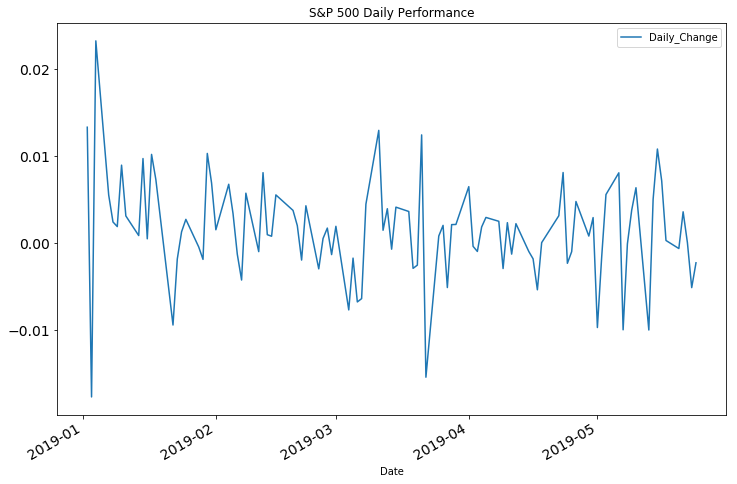

In [162]:
%matplotlib inline 
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import statsmodels.api as sm

SP500.plot(figsize=(12,8), title= 'S&P 500 Daily Performance', fontsize=14)

In [163]:
SP500

Daily_Change
Date                    
2019-01-02      0.013351
2019-01-03     -0.017669
2019-01-04      0.023283
2019-01-07      0.005553
2019-01-08      0.002453
2019-01-09      0.001922
2019-01-10      0.008988
2019-01-11      0.003149
2019-01-14      0.000891
2019-01-15      0.009748
2019-01-16      0.000516
2019-01-17      0.010225
2019-01-18      0.007332
2019-01-22     -0.009398
2019-01-23     -0.001808
2019-01-24      0.001323
2019-01-25      0.002755
2019-01-28     -0.000423
2019-01-29     -0.001849
2019-01-30      0.010337
2019-01-31      0.006930
2019-02-01      0.001558
2019-02-04      0.006791
2019-02-05      0.003431
2019-02-06     -0.001258
2019-02-07     -0.004224
2019-02-08      0.005764
2019-02-11     -0.000959
2019-02-12      0.008125
2019-02-13      0.000993
...                  ...
2019-04-12      0.002258
2019-04-15     -0.000942
2019-04-16     -0.001786
2019-04-17     -0.005346
2019-04-18      0.000076
2019-04-22      0.003170
2019-04-23      0.008141
2019-04-24     -0.002301
2019-04-25     -0.000963
2019-04-26      0.004809
2019-04-29      0.000833
2019-04-30      0.002959
2019-05-01     -0.009687
2019-05-02     -0.001588
2019-05-03      0.005609
2019-05-06      0.008106
2019-05-07     -0.009948
2019-05-08     -0.000066
2019-05-09      0.003804
2019-05-10      0.006392
2019-05-13     -0.009971
2019-05-14      0.005067
2019-05-15      0.010843
2019-05-16      0.007185
2019-05-17      0.000325
2019-05-20     -0.000602
2019-05-21      0.003623
2019-05-22      0.000074
2019-05-23     -0.005097
2019-05-24     -0.002242

[100 rows x 1 columns]

<Figure size 432x288 with 0 Axes>

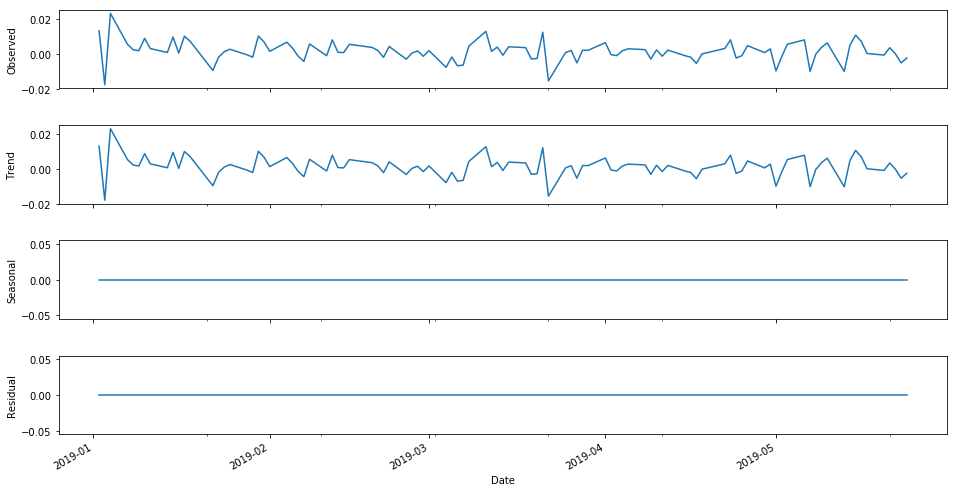

In [164]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(SP500, freq=1)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

In [165]:
daily_sentiment

neg_headline  neu_headline  pos_headline  net_sentiment
date                                                               
2019-01-01      0.107000      0.727500      0.165500       0.786000
2019-01-02      0.213333      0.682333      0.104000       0.573000
2019-01-03      0.067250      0.892250      0.040250       0.865250
2019-01-04      0.071333      0.813500      0.115000       0.857167
2019-01-05      0.088000      0.893500      0.018500       0.824000
2019-01-06      0.101667      0.784333      0.114000       0.796667
2019-01-07      0.087000      0.761250      0.151750       0.826000
2019-01-08      0.076750      0.786000      0.137000       0.846250
2019-01-09      0.070400      0.837400      0.092000       0.859000
2019-01-10      0.155000      0.803222      0.041889       0.690111
2019-01-11      0.123333      0.788667      0.088000       0.753333
2019-01-12      0.019000      0.942000      0.039000       0.962000
2019-01-14      0.169167      0.760167      0.070667       0.661667
2019-01-15      0.000000      1.000000      0.000000       1.000000
2019-01-16      0.124250      0.868250      0.007500       0.751500
2019-01-17      0.097000      0.862000      0.041000       0.806000
2019-01-18      0.036667      0.869333      0.094000       0.926667
2019-01-20      0.077500      0.811500      0.111000       0.845000
2019-01-21      0.000000      0.956000      0.044000       1.000000
2019-01-22      0.132800      0.779800      0.087600       0.734600
2019-01-23      0.060500      0.870000      0.069500       0.879000
2019-01-24      0.037750      0.898250      0.064250       0.924750
2019-01-25      0.069000      0.842000      0.089500       0.862500
2019-01-28      0.085667      0.887667      0.026667       0.828667
2019-01-29      0.112000      0.850000      0.038000       0.776000
2019-01-30      0.046200      0.924200      0.029600       0.907600
2019-01-31      0.017333      0.838667      0.144000       0.965333
2019-02-01      0.132000      0.805000      0.062000       0.735000

In [166]:
daily_sentiment_diff = daily_sentiment.diff(periods=1 ,axis=0)

In [167]:
daily_net_sentiment = daily_sentiment.merge(daily_sentiment_diff, left_index=True, right_index=True)
daily_net_sentiment

neg_headline_x  neu_headline_x  pos_headline_x  net_sentiment_x  \
date                                                                          
2019-01-01        0.107000        0.727500        0.165500         0.786000   
2019-01-02        0.213333        0.682333        0.104000         0.573000   
2019-01-03        0.067250        0.892250        0.040250         0.865250   
2019-01-04        0.071333        0.813500        0.115000         0.857167   
2019-01-05        0.088000        0.893500        0.018500         0.824000   
2019-01-06        0.101667        0.784333        0.114000         0.796667   
2019-01-07        0.087000        0.761250        0.151750         0.826000   
2019-01-08        0.076750        0.786000        0.137000         0.846250   
2019-01-09        0.070400        0.837400        0.092000         0.859000   
2019-01-10        0.155000        0.803222        0.041889         0.690111   
2019-01-11        0.123333        0.788667        0.088000         0.753333   
2019-01-12        0.019000        0.942000        0.039000         0.962000   
2019-01-14        0.169167        0.760167        0.070667         0.661667   
2019-01-15        0.000000        1.000000        0.000000         1.000000   
2019-01-16        0.124250        0.868250        0.007500         0.751500   
2019-01-17        0.097000        0.862000        0.041000         0.806000   
2019-01-18        0.036667        0.869333        0.094000         0.926667   
2019-01-20        0.077500        0.811500        0.111000         0.845000   
2019-01-21        0.000000        0.956000        0.044000         1.000000   
2019-01-22        0.132800        0.779800        0.087600         0.734600   
2019-01-23        0.060500        0.870000        0.069500         0.879000   
2019-01-24        0.037750        0.898250        0.064250         0.924750   
2019-01-25        0.069000        0.842000        0.089500         0.862500   
2019-01-28        0.085667        0.887667        0.026667         0.828667   
2019-01-29        0.112000        0.850000        0.038000         0.776000   
2019-01-30        0.046200        0.924200        0.029600         0.907600   
2019-01-31        0.017333        0.838667        0.144000         0.965333   
2019-02-01        0.132000        0.805000        0.062000         0.735000   

            neg_headline_y  neu_headline_y  pos_headline_y  net_sentiment_y  
date                                                                         
2019-01-01             NaN             NaN             NaN              NaN  
2019-01-02        0.106333       -0.045167       -0.061500        -0.213000  
2019-01-03       -0.146083        0.209917       -0.063750         0.292250  
2019-01-04        0.004083       -0.078750        0.074750        -0.008083  
2019-01-05        0.016667        0.080000       -0.096500        -0.033167  
2019-01-06        0.013667       -0.109167        0.095500        -0.027333  
2019-01-07       -0.014667       -0.023083        0.037750         0.029333  
2019-01-08       -0.010250        0.024750       -0.014750         0.020250  
2019-01-09       -0.006350        0.051400       -0.045000         0.012750  
2019-01-10        0.084600       -0.034178       -0.050111        -0.168889  
2019-01-11       -0.031667       -0.014556        0.046111         0.063222  
2019-01-12       -0.104333        0.153333       -0.049000         0.208667  
2019-01-14        0.150167       -0.181833        0.031667        -0.300333  
2019-01-15       -0.169167        0.239833       -0.070667         0.338333  
2019-01-16        0.124250       -0.131750        0.007500        -0.248500  
2019-01-17       -0.027250       -0.006250        0.033500         0.054500  
2019-01-18       -0.060333        0.007333        0.053000         0.120667  
2019-01-20        0.040833       -0.057833        0.017000        -0.081667  
2019-01-21       -0.077500        0.144500       -0.067000         0.155000  
201

In [168]:
daily_net_sentiment['Open_Sentiment'] = daily_net_sentiment['net_sentiment_x'] - daily_net_sentiment['net_sentiment_y']


In [169]:
daily_net_sentiment['Closing_Sentiment'] = daily_net_sentiment['net_sentiment_x']
daily_net_sentiment['Daily_Change_Sentiment'] = daily_net_sentiment['Closing_Sentiment'] / daily_net_sentiment['Open_Sentiment'] -1

In [170]:
daily_Change_Net_Sentiment = pd.DataFrame(daily_net_sentiment['Daily_Change_Sentiment'])
daily_Change_Net_Sentiment

Daily_Change_Sentiment
date                              
2019-01-01                     NaN
2019-01-02               -0.270992
2019-01-03                0.510035
2019-01-04               -0.009342
2019-01-05               -0.038693
2019-01-06               -0.033172
2019-01-07                0.036820
2019-01-08                0.024516
2019-01-09                0.015066
2019-01-10               -0.196611
2019-01-11                0.091612
2019-01-12                0.276991
2019-01-14               -0.312197
2019-01-15                0.511335
2019-01-16               -0.248500
2019-01-17                0.072522
2019-01-18                0.149711
2019-01-20               -0.088129
2019-01-21                0.183432
2019-01-22               -0.265400
2019-01-23                0.196570
2019-01-24                0.052048
2019-01-25               -0.067315
2019-01-28               -0.039227
2019-01-29               -0.063556
2019-01-30                0.169588
2019-01-31                0.063611
2019-02-01               -0.238605

In [171]:
SP500_Sentiment = daily_Change_Net_Sentiment.merge(SP500, left_index=True, right_index=True)
SP500_Sentiment

Daily_Change_Sentiment  Daily_Change
2019-01-02               -0.270992      0.013351
2019-01-03                0.510035     -0.017669
2019-01-04               -0.009342      0.023283
2019-01-07                0.036820      0.005553
2019-01-08                0.024516      0.002453
2019-01-09                0.015066      0.001922
2019-01-10               -0.196611      0.008988
2019-01-11                0.091612      0.003149
2019-01-14               -0.312197      0.000891
2019-01-15                0.511335      0.009748
2019-01-16               -0.248500      0.000516
2019-01-17                0.072522      0.010225
2019-01-18                0.149711      0.007332
2019-01-22               -0.265400     -0.009398
2019-01-23                0.196570     -0.001808
2019-01-24                0.052048      0.001323
2019-01-25               -0.067315      0.002755
2019-01-28               -0.039227     -0.000423
2019-01-29               -0.063556     -0.001849
2019-01-30                0.169588      0.010337
2019-01-31                0.063611      0.006930
2019-02-01               -0.238605      0.001558

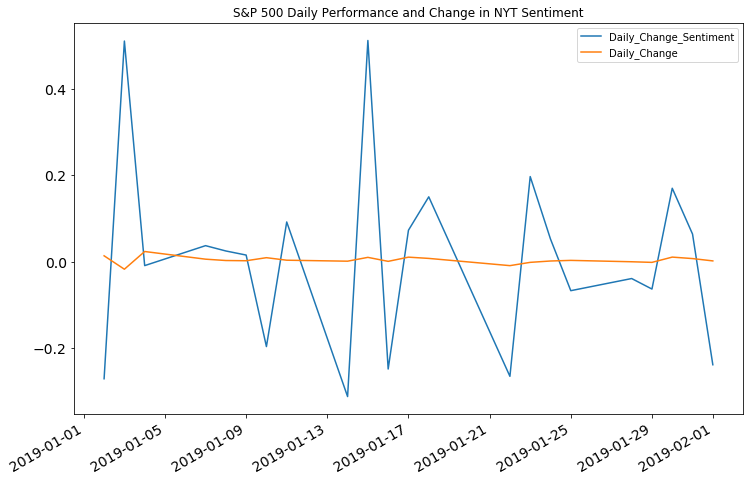

In [172]:
SP500_Sentiment.plot(figsize=(12,8), title= 'S&P 500 Daily Performance and Change in NYT Sentiment', fontsize=14)